In [13]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

## 1. Config

In [2]:
YEAR = 2024

application_arrival_path = f'Inkomna ansökningar om asyl {YEAR}.xlsx'
application_settled_path = f'Avgjorda asylärenden {YEAR}.xlsx'

## 2. Import Data

In [3]:
# -------- APPLICATIONS BY MEMBERSHIP COUNTRY --------
application_arrival_df = pd.read_excel(application_arrival_path, sheet_name='Medborgarskap, persontyp', skiprows=3)
application_settled_df = pd.read_excel(application_settled_path, sheet_name='Medborgarskap, första ansökan', skiprows=3)

In [4]:
# -------- FIRST TIME APPLICANTS --------
application_arrival_firstTime_df = application_arrival_df.iloc[:, :5]   # first 5 columns
application_arrival_firstTime_df = application_arrival_firstTime_df.sort_values(by='Totalt', ascending=False).reset_index(drop=True)
application_settled_firstTime_df = application_settled_df.iloc[:, :9]
application_settled_firstTime_df = application_settled_firstTime_df.sort_values(by='Totalt', ascending=False).reset_index(drop=True)

In [5]:
# -------- UNDER TPD --------
application_arrival_TPD_df = application_arrival_df.iloc[:, 12:18]   # first 5 columns
application_arrival_TPD_df = application_arrival_TPD_df.sort_values(by='Totalt.2', ascending=False).reset_index(drop=True)
application_arrival_TPD_df.columns = application_arrival_TPD_df.columns.str.replace(r'\..*$', '', regex=True)

application_settled_TPD_df = application_settled_df.iloc[:, 10:16]
application_settled_TPD_df = application_settled_TPD_df.sort_values(by='Totalt.1', ascending=False).reset_index(drop=True)
application_settled_TPD_df.columns = application_settled_TPD_df.columns.str.replace(r'\..*$', '', regex=True)

## 3. Visulaise

### 3.1 Incoming Applications

In [6]:
all_applications_df = application_arrival_firstTime_df[['Medborgarskap', 'Vuxen', 'Barn i familj', 'Ensamkommande \nbarn', 'Totalt']].copy()

all_applications_df = all_applications_df.merge(application_arrival_TPD_df[['Medborgarskap', 'Totalt']], on='Medborgarskap', how='outer', suffixes=('', '.TPD'))
all_applications_df['Tot'] = all_applications_df['Totalt'] + all_applications_df['Totalt.TPD']
df = all_applications_df.copy()
df = df[df['Medborgarskap'] != 'Totalt']

col_vuxen = 'Vuxen'
col_barn_fam = ['Barn i familj']
col_ekb = ['Ensamkommande \nbarn']
col_tpd = ['Totalt.TPD']
col_total = 'Tot'

# Sort by total and keep top 20
df_top = df.sort_values(by=col_total, ascending=False).head(20)

countries = df_top['Medborgarskap'].astype(str).tolist()

# Convert to plain Python lists of floats
vuxen = [float(x) for x in df_top[col_vuxen].values]
barn_fam = [float(x) for x in df_top[col_barn_fam].values]
ekb = [float(x) for x in df_top[col_ekb].values]
tpd = [float(x) for x in df_top[col_tpd].values]

# x positions
x = list(range(len(countries)))

# Precompute bottoms for stacks
bottom_barn = vuxen
bottom_ekb = [v + b for v, b in zip(vuxen, barn_fam)]
bottom_tpd = [v + b + e for v, b, e in zip(vuxen, barn_fam, ekb)]

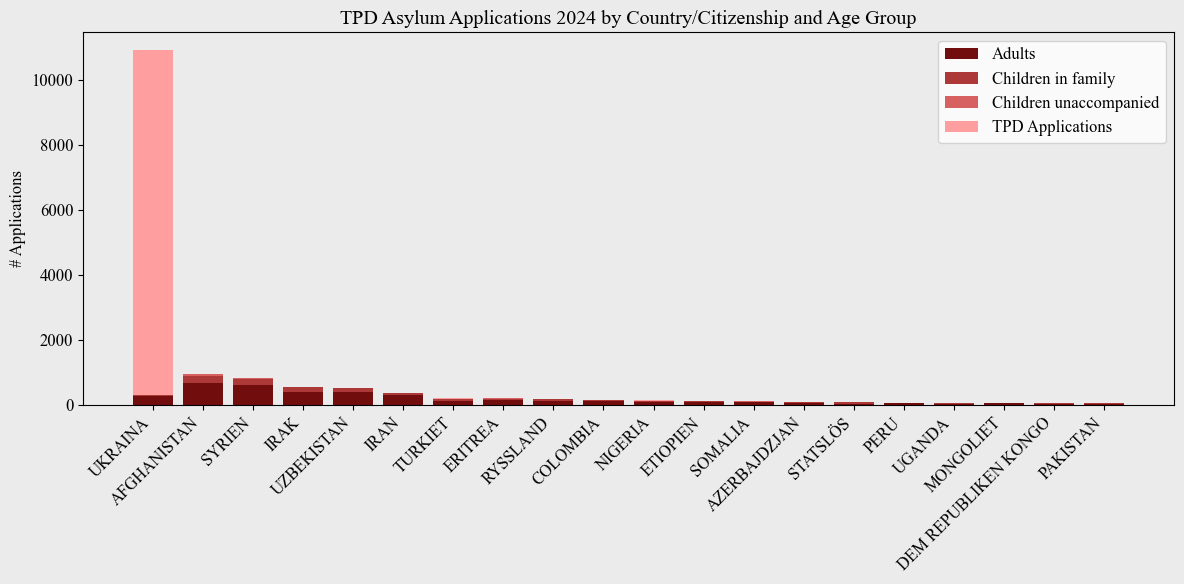

In [14]:
fig, ax = plt.subplots(figsize=(12, 6), facecolor="#ebebeb") 
ax.set_facecolor("#ebebeb")

ax.bar(x, vuxen, label='Adults', color='#720d0d')
ax.bar(x, barn_fam, bottom=bottom_barn, label='Children in family', color="#ac3838")
ax.bar(x, ekb, bottom=bottom_ekb, label='Children unaccompanied', color="#d76060")
ax.bar(x, tpd, bottom=bottom_tpd, label='TPD Applications', color="#ff9e9e")


ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')
ax.set_ylabel('# Applications')
ax.set_title('TPD Asylum Applications 2024 by Country/Citizenship and Age Group')
ax.legend(loc='upper right')
fig.tight_layout()
plt.show()


### 3.2 Applications - Settled

In [8]:
application_settled_firstTime_df['Annat'] = application_settled_firstTime_df['Totalt'] - (application_settled_firstTime_df['Bifall'] + application_settled_firstTime_df['Avslag'])

all_applications_settled_df = application_settled_firstTime_df[['Medborgarskap', 'Bifall', 'Avslag', 'Annat', 'Totalt']].copy()
all_applications_settled_df = all_applications_settled_df.merge(application_settled_TPD_df[['Medborgarskap', 'Bifall', 'Avslag']], on='Medborgarskap', how='outer', suffixes=('', '.TPD'))

df = all_applications_settled_df.copy()
df = df[df['Medborgarskap'] != 'Totalt']

col_bifall = 'Bifall'
col_avslag = ['Avslag']
col_annat = ['Annat']
col_tpd_bifall = ['Bifall.TPD']
col_tpd_avslag = ['Avslag.TPD']
col_total = 'Totalt'

# Sort by total and keep top 20
df_top = df.sort_values(by=col_total, ascending=False).head(20)

countries = df_top['Medborgarskap'].astype(str).tolist()

# Convert to plain Python lists of floats
bifall = [float(x) for x in df_top[col_bifall].values]
avslag = [float(x) for x in df_top[col_avslag].values]
annat = [float(x) for x in df_top[col_annat].values]
tpd_bifall = [float(x) for x in df_top[col_tpd_bifall].values]
tpd_avslag = [float(x) for x in df_top[col_tpd_avslag].values]

# x positions
x = list(range(len(countries)))

# Precompute bottoms for stacks
bottom_avslag = bifall
bottom_annat = [v + b for v, b in zip(bifall, avslag)]
bottom_tpd_bifall = [v + b + e for v, b, e in zip(bifall, avslag, annat)]
bottom_tpd_avslag = [v + b + e + a for v, b, e, a in zip(bifall, avslag, annat, tpd_bifall)]

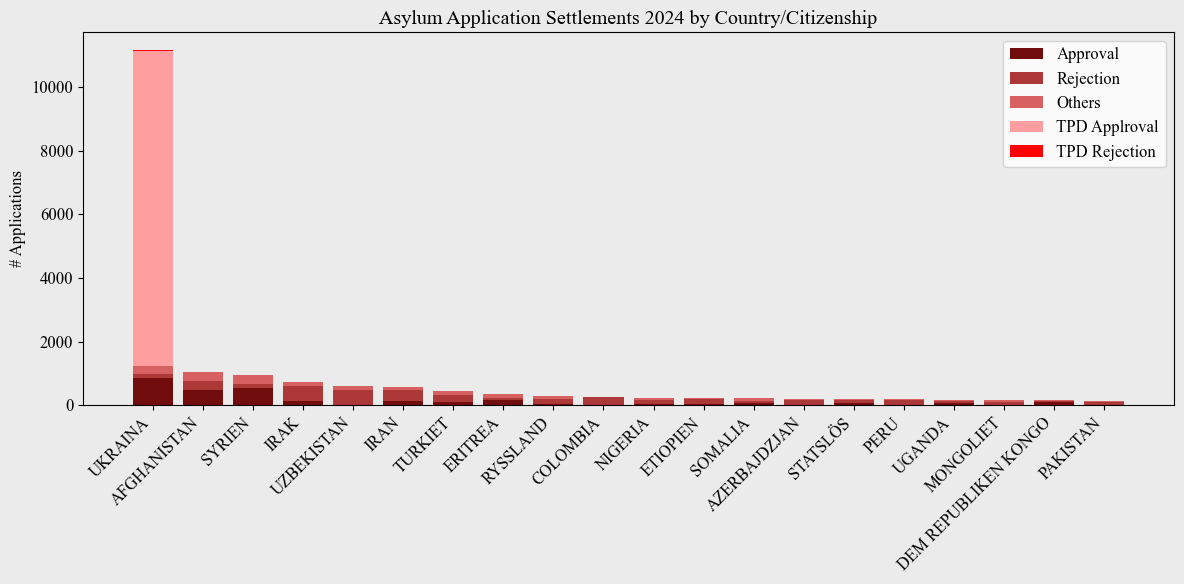

In [17]:
fig, ax = plt.subplots(figsize=(12, 6), facecolor="#ebebeb") 
ax.set_facecolor("#ebebeb")

ax.bar(x, bifall, label='Approval', color='#720d0d')
ax.bar(x, avslag, bottom=bottom_avslag, label='Rejection', color="#ac3838")
ax.bar(x, annat, bottom=bottom_annat, label='Others', color="#d76060")
ax.bar(x, tpd_bifall, bottom=bottom_tpd_bifall, label='TPD Applroval', color="#ff9e9e")
ax.bar(x, tpd_avslag, bottom=bottom_tpd_avslag, label='TPD Rejection', color="#FF0101")


ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')
ax.set_ylabel('# Applications')
ax.set_title('Asylum Application Settlements 2024 by Country/Citizenship')
ax.legend(loc='upper right')
fig.tight_layout()
plt.show()
